### 1. Barplots for disease terms used for each disorder category to extract SNPS from GWAS

In [2]:
import pandas as pd

ebi = pd.read_table('/data/reddylab/Revathy/collabs/Maria/human-th-ms_new/data/snp_data/source_snps/EBI_GWAS_v1.tab', low_memory=False)
ebi.columns

Index(['DATE ADDED TO CATALOG', 'PUBMEDID', 'FIRST AUTHOR', 'DATE', 'JOURNAL',
       'LINK', 'STUDY', 'DISEASE/TRAIT', 'INITIAL SAMPLE SIZE',
       'REPLICATION SAMPLE SIZE', 'REGION', 'CHR_ID', 'CHR_POS',
       'REPORTED GENE(S)', 'MAPPED_GENE', 'UPSTREAM_GENE_ID',
       'DOWNSTREAM_GENE_ID', 'SNP_GENE_IDS', 'UPSTREAM_GENE_DISTANCE',
       'DOWNSTREAM_GENE_DISTANCE', 'STRONGEST SNP-RISK ALLELE', 'SNPS',
       'MERGED', 'SNP_ID_CURRENT', 'CONTEXT', 'INTERGENIC',
       'RISK ALLELE FREQUENCY', 'P-VALUE', 'PVALUE_MLOG', 'P-VALUE (TEXT)',
       'OR or BETA', '95% CI (TEXT)', 'PLATFORM [SNPS PASSING QC]', 'CNV'],
      dtype='object')

In [3]:
disease_all = ebi['DISEASE/TRAIT'].unique().tolist()

ms_terms = [x for x in disease_all if 'Multiple sclerosis' in x]
ibd_terms = [x for x in disease_all if any(x.startswith(a) for a in ("Crohn's", "Inflammatory bowel disease", "Ulcerative colitis")) and "pleiotropy" not in x and '(' not in x]
ra_terms = [x for x in disease_all if 'Rheumatoid arthritis' in x]
ps_terms = [x for x in disease_all if 'Psoriasis' in x]

print(len(ms_terms))
print(len(ibd_terms))
print(len(ra_terms))
print(len(ps_terms))


14
7
6
2


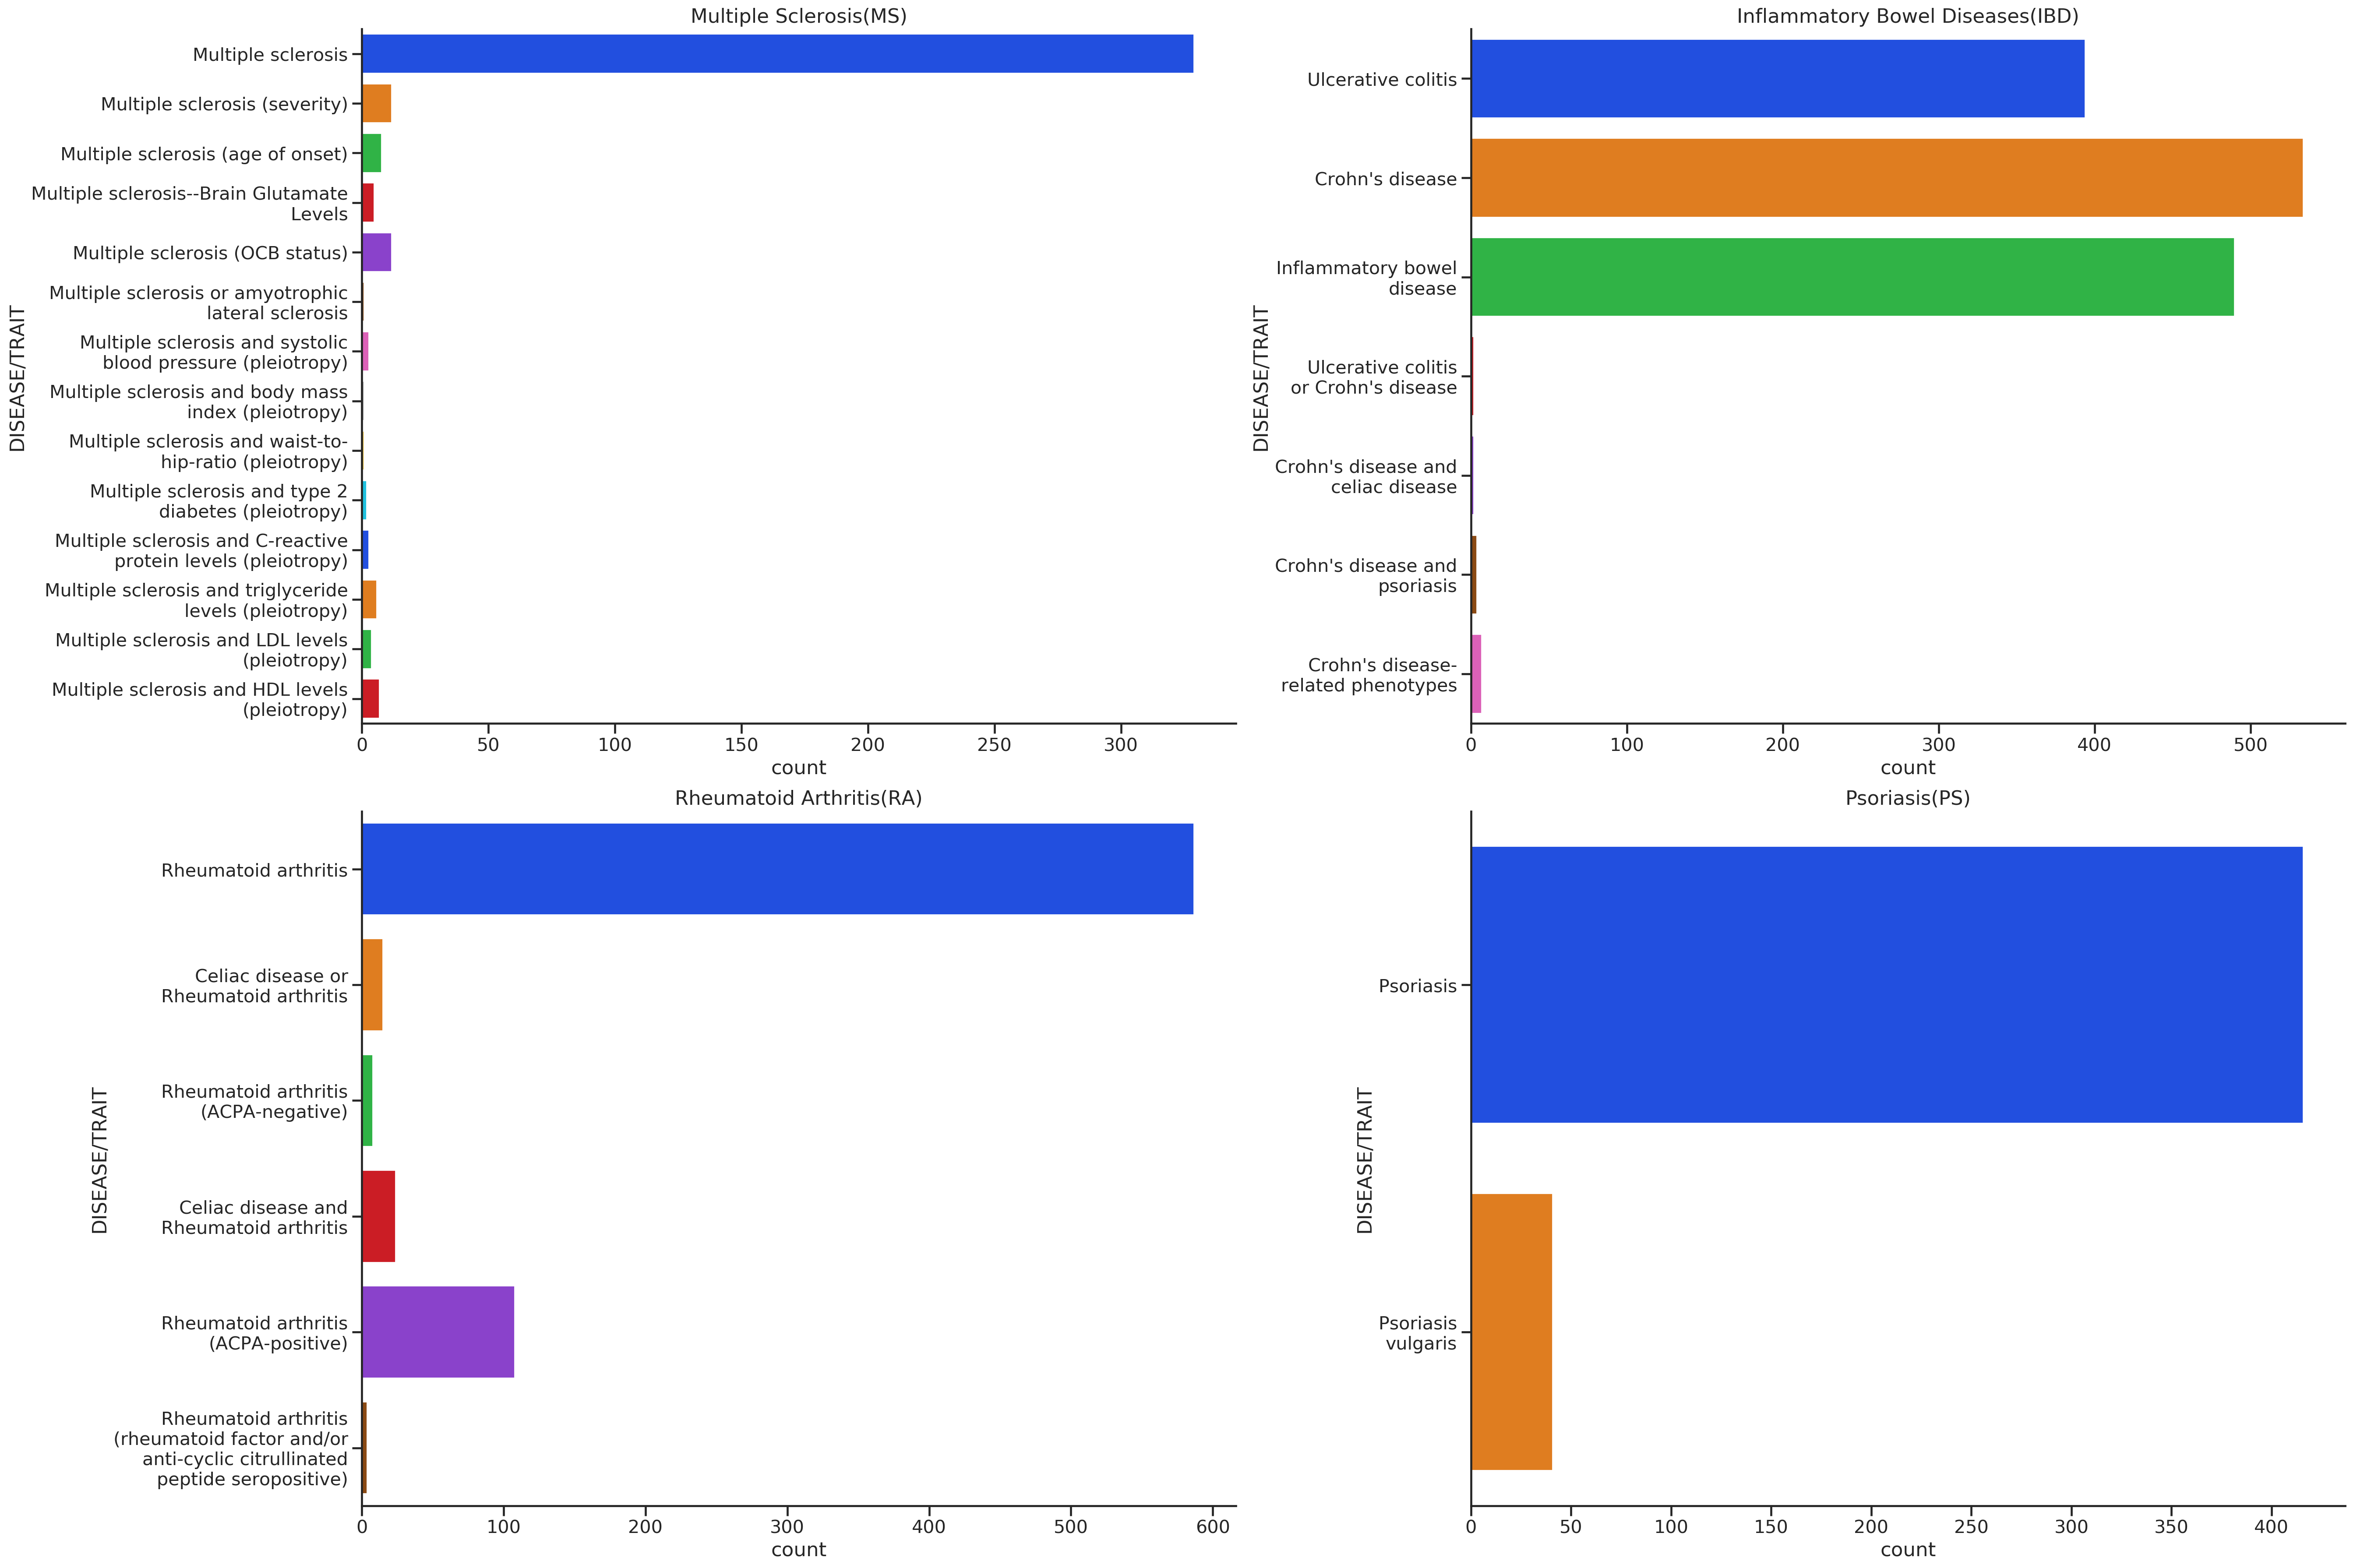

In [38]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import textwrap

sns.set_context("talk")
sns.set_style("whitegrid")
plt.rcParams['pdf.fonttype'] = 3
sns.set_style("ticks", {"xtick.major.size": 5, "ytick.major.size": 5})
%matplotlib inline

plt.rcParams.update({'figure.figsize':(30,20), 'figure.dpi':180})

fig, ax = plt.subplots(2,2)

y_axis=range(6)

ax1=ax.flatten()[0]
sns.countplot(data=ebi[ebi['DISEASE/TRAIT'].isin(ms_terms)], y='DISEASE/TRAIT', palette='bright', ax=ax1)
labels = [textwrap.fill(label.get_text(), 35) for label in ax1.get_yticklabels()]
ax1.set_yticklabels(labels)
ax1.set_title('Multiple Sclerosis(MS)')

ax2=ax.flatten()[1]
sns.countplot(data=ebi[ebi['DISEASE/TRAIT'].isin(ibd_terms)], y='DISEASE/TRAIT', palette='bright', ax=ax2)
labels = [textwrap.fill(label.get_text(), 20) for label in ax2.get_yticklabels()]
ax2.set_yticklabels(labels)
ax2.set_title('Inflammatory Bowel Diseases(IBD)')

ax3=ax.flatten()[2]
sns.countplot(data=ebi[ebi['DISEASE/TRAIT'].isin(ra_terms)], y='DISEASE/TRAIT', palette='bright', ax=ax3)
labels = [textwrap.fill(label.get_text(), 25) for label in ax3.get_yticklabels()]
ax3.set_yticklabels(labels)
ax3.set_title('Rheumatoid Arthritis(RA)')

ax4=ax.flatten()[3]
sns.countplot(data=ebi[ebi['DISEASE/TRAIT'].isin(ps_terms)], y='DISEASE/TRAIT', palette='bright', ax=ax4)
labels = [textwrap.fill(label.get_text(), 15) for label in ax4.get_yticklabels()]
ax4.set_yticklabels(labels)
ax4.set_title('Psoriasis(PS)')


sns.despine(fig,ax)
plt.tight_layout()
plt.savefig('/data/reddylab/Revathy/collabs/Maria/human-th-ms_new/lab_meeting/plots/SNPS_disease_terms_barplots.pdf')
plt.show()

In [24]:
range(2)

range(0, 2)

## 2. Stacked barplots

In [20]:
print(len(gwas_snps['SNPS'].unique()))
print(len(gwas_snps))

1898
3298


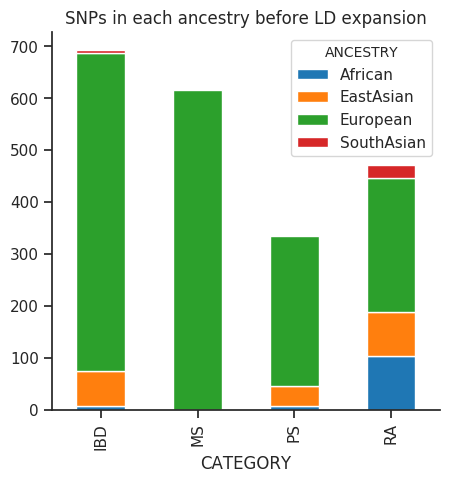

616
676
341
329


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("notebook")
plt.rcParams['pdf.fonttype'] = 3
sns.set_style("ticks")
%matplotlib inline

plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})

gwas_snps = pd.read_csv('/data/reddylab/Revathy/collabs/Maria/human-th-ms_new/data_v1/snp_data/source_snps/gwas_snps_ancestry_disorder.txt', sep='\t')

gwas_snps['ANCESTRY'] = gwas_snps['ANCESTRY'].replace({'ASW':'African','EUR':'European','EUR ':'European','EAS':'EastAsian','SAS':'SouthAsian'})
gwas_snps.drop_duplicates().groupby(['CATEGORY','ANCESTRY']).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5), title='SNPs in each ancestry before LD expansion')

sns.despine()
plt.show()
print(len(gwas_snps['SNPS'][gwas_snps['CATEGORY']=='MS'].drop_duplicates()))
print(len(gwas_snps['SNPS'][gwas_snps['CATEGORY']=='IBD'].drop_duplicates()))
print(len(gwas_snps['SNPS'][gwas_snps['CATEGORY']=='RA'].drop_duplicates()))
print(len(gwas_snps['SNPS'][gwas_snps['CATEGORY']=='PS'].drop_duplicates()))

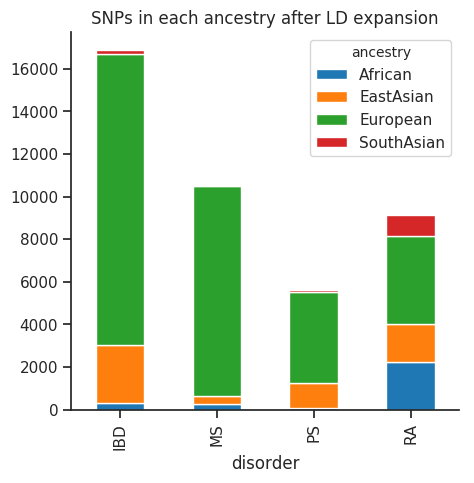

10491
16883
9139
5626


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("notebook")
plt.rcParams['pdf.fonttype'] = 3
sns.set_style("ticks")
%matplotlib inline

plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})

snps = pd.read_csv('/data/reddylab/Revathy/collabs/Maria/human-th-ms_new/data_v1/snp_data/ancestry/all_ld_snps_r2_0.8_new.sorted.bed', sep='\t',
                   names=['chr','start','end','snp_id','ancestry','disorder','allele_string','minor_allele','origin','diff'])

snps.drop_duplicates().groupby(['disorder','ancestry']).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5), title='SNPs in each ancestry after LD expansion')

sns.despine()
plt.show()
print(len(snps['snp_id'][snps['disorder']=='MS']))
print(len(snps['snp_id'][snps['disorder']=='IBD']))
print(len(snps['snp_id'][snps['disorder']=='RA']))
print(len(snps['snp_id'][snps['disorder']=='PS']))


In [22]:
len(snps['snp_id'].unique())

32661

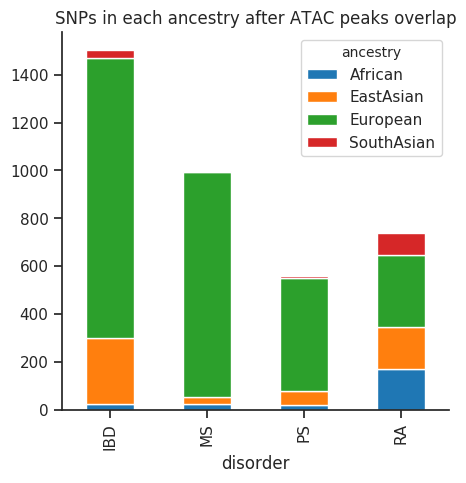

996
1504
737
559


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("notebook")
plt.rcParams['pdf.fonttype'] = 3
sns.set_style("ticks")
%matplotlib inline

plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})

snps_peaks = pd.read_csv('/data/reddylab/Revathy/collabs/Maria/human-th-ms_new/data_v1/snp_data/ancestry/MasterTable_all_snp_gene_atac.txt', sep='\t')

snps_peaks.drop_duplicates().groupby(['disorder','ancestry']).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5), title='SNPs in each ancestry after ATAC peaks overlap')

sns.despine()
plt.show()
print(len(snps_peaks['name_snp'][snps_peaks['disorder']=='MS']))
print(len(snps_peaks['name_snp'][snps_peaks['disorder']=='IBD']))
print(len(snps_peaks['name_snp'][snps_peaks['disorder']=='RA']))
print(len(snps_peaks['name_snp'][snps_peaks['disorder']=='PS']))


In [23]:
len(snps_peaks['name_snp'].unique())

2330

In [1]:
!head /data/reddylab/Revathy/collabs/Maria/human-th-ms_new/data_v1/snp_data/source_snps/ebi_gwas_snp_ms_subset_correct.txt

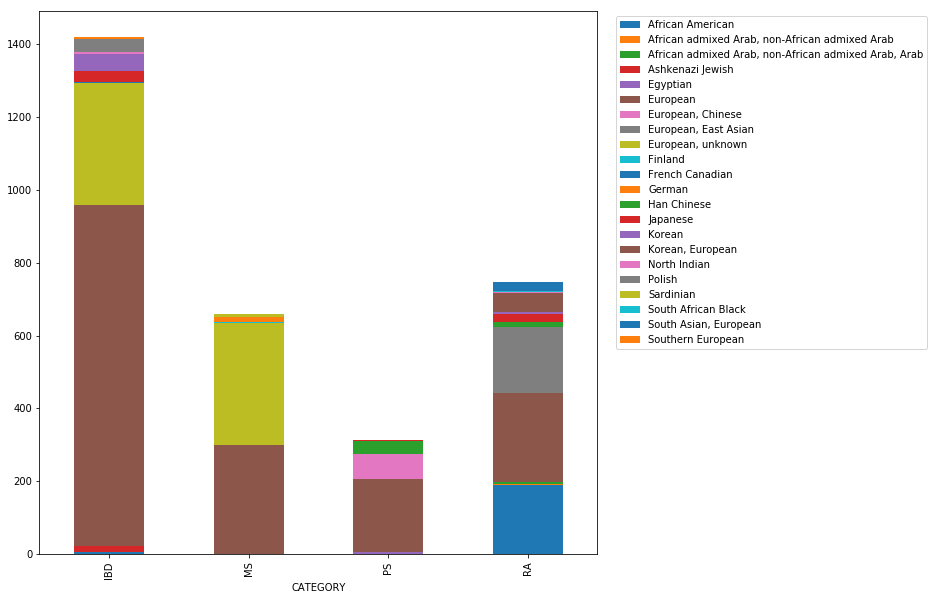

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ms = pd.read_csv('/data/reddylab/Revathy/collabs/Maria/human-th-ms_new/data_v1/snp_data/source_snps/ebi_gwas_snp_ms_subset_correct.txt', sep='\t')
ibd = pd.read_csv('/data/reddylab/Revathy/collabs/Maria/human-th-ms_new/data_v1/snp_data/source_snps/ebi_gwas_snp_ibd_subset_correct.txt', sep='\t')
ra = pd.read_csv('/data/reddylab/Revathy/collabs/Maria/human-th-ms_new/data_v1/snp_data/source_snps/ebi_gwas_snp_ra_subset_correct.txt', sep='\t')
ps = pd.read_csv('/data/reddylab/Revathy/collabs/Maria/human-th-ms_new/data_v1/snp_data/source_snps/ebi_gwas_snp_ps_subset_correct.txt', sep='\t')

combined = pd.concat([ms,ibd,ra,ps], ignore_index=True)
combined['ANCESTRY'] = combined['ANCESTRY'].replace({'European ':'European'})
combined.groupby(['CATEGORY','ANCESTRY']).size().unstack().plot(kind='bar',stacked=True, figsize=(10,10))

plt.legend(bbox_to_anchor=(1.6, 1), loc='upper right', ncol=1)



In [8]:
ps

,PUBMEDID,SNPS,ANCESTRY,CATEGORY
0,18369459,rs7993214,European,PS
1,18369459,rs2395029,European,PS
2,18369459,rs10484554,European,PS
3,20953189,rs1008953,NaN,PS
4,20953189,rs1975974,NaN,PS
5,20953189,rs842636,NaN,PS
6,20953189,rs10782001,NaN,PS
7,20953189,rs12586317,NaN,PS
8,20953189,rs4795067,NaN,PS
9,20953189,rs495337,NaN,PS


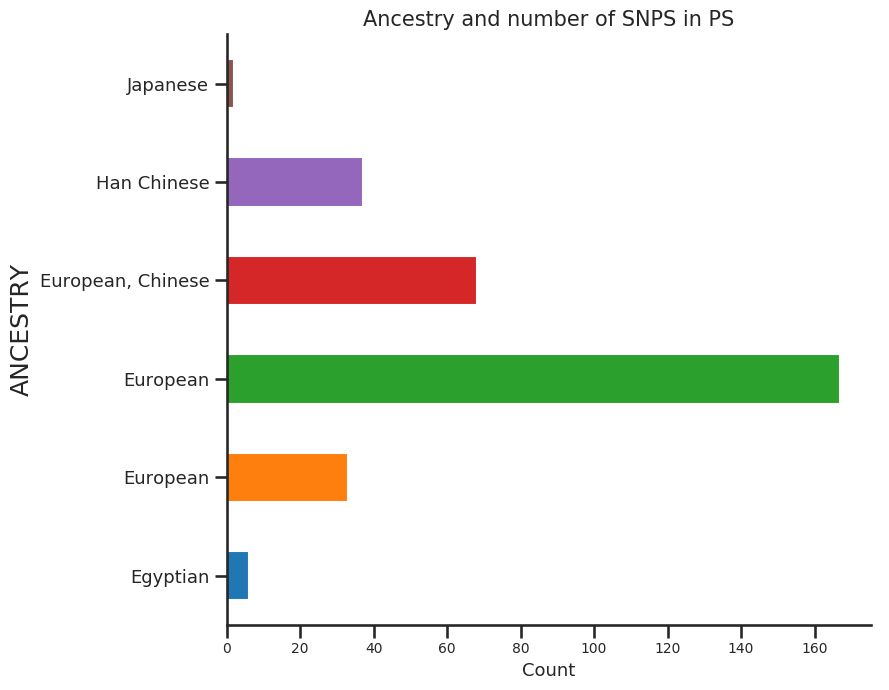

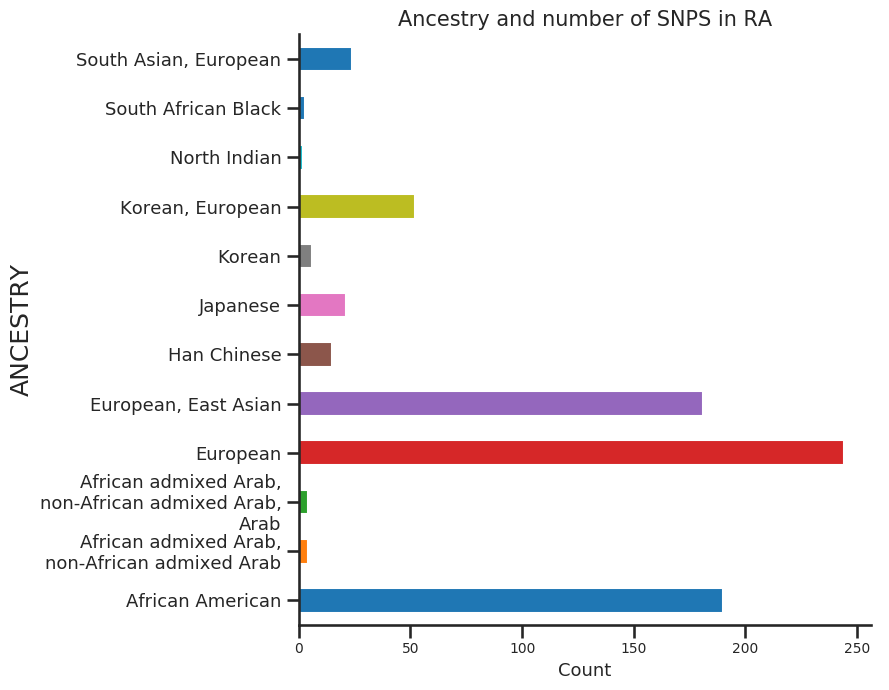

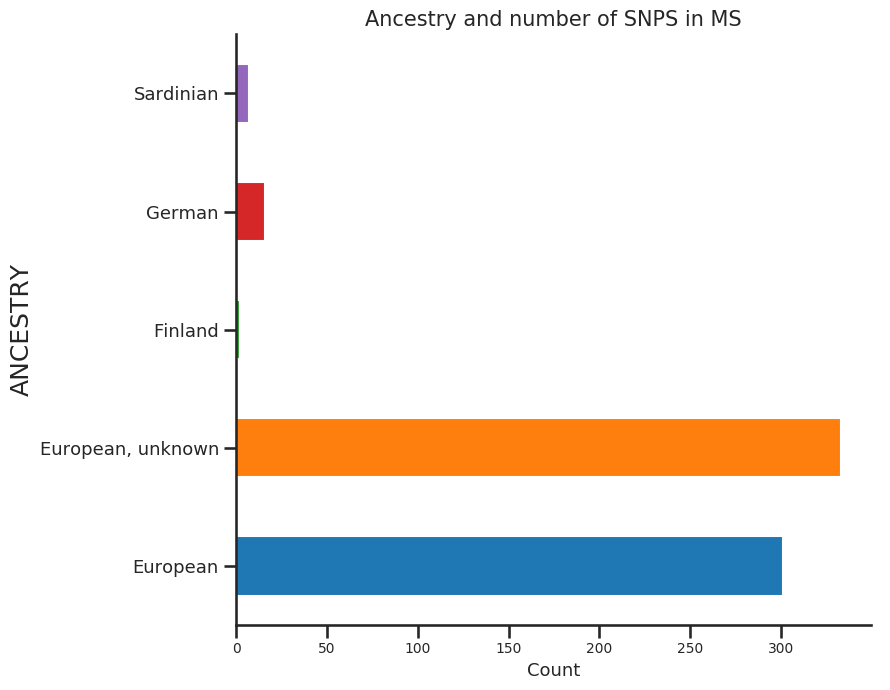

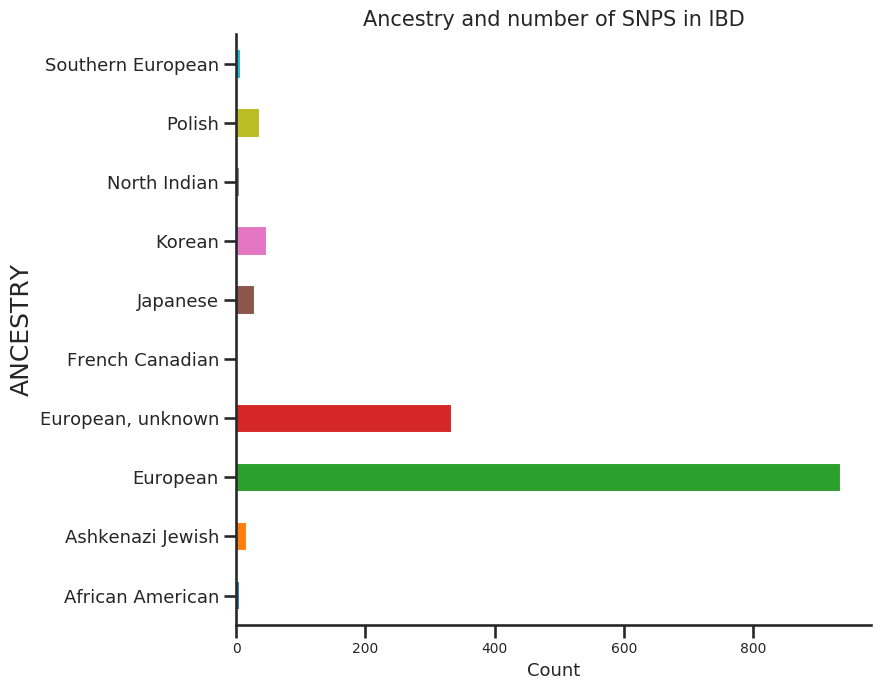

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

sns.set_context("talk")
plt.rcParams['pdf.fonttype'] = 3
sns.set_style("ticks")
%matplotlib inline

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':100})

ancestry_files = {
    'MS':'/data/reddylab/Revathy/collabs/Maria/human-th-ms_new/data_v1/snp_data/source_snps/ebi_gwas_snp_ms_subset_correct.txt',
    'IBD':'/data/reddylab/Revathy/collabs/Maria/human-th-ms_new/data_v1/snp_data/source_snps/ebi_gwas_snp_ibd_subset_correct.txt',
    'RA':'/data/reddylab/Revathy/collabs/Maria/human-th-ms_new/data_v1/snp_data/source_snps/ebi_gwas_snp_ra_subset_correct.txt',
    'PS':'/data/reddylab/Revathy/collabs/Maria/human-th-ms_new/data_v1/snp_data/source_snps/ebi_gwas_snp_ps_subset_correct.txt'
}

for disease, file in ancestry_files.items():
    ancestry = pd.read_csv(file, sep='\t')
    ancestry_count = ancestry.groupby(['ANCESTRY'])['SNPS'].count()
    ax = ancestry_count.plot(kind='barh', figsize=(9,7), fontsize=10)
    ax.set_alpha(0.8)
    ax.set_title("Ancestry and number of SNPS in %s"% disease, fontsize=15)
    ax.set_xlabel("Count", fontsize=13)
    labels = [textwrap.fill(label.get_text(), 25) for label in ax.get_yticklabels()]
    ax.set_yticklabels(labels, fontsize=13)
    sns.despine()
    plt.tight_layout()
    plt.savefig("/data/reddylab/Revathy/collabs/Maria/human-th-ms_new/lab_meeting/plots/Ancestry_and_number_of_SNPS_in_%s.pdf"% disease)
    plt.show()
    
